# ARIMA Prediction model introduction

For the next step in our project, working on predicting future CPI's given the data that we currently have. To do this, we will create a prediction model that will do that for us.


CPI data can be interpretted as a type of time series data.

**Time Series** = Data that is organized based on time. (In our case, we are looking at dates of our data)


**Time Series Characteristics**
- trend = increase and decreases for a given time period
- seasonality = seasonal differences, consistent changes (increase or decreases) over a period of time
- noise = random changes in the data that is not a specific trend or seasonality, could also be some data entry errors


To use a time series model time series prediction model, must check if the data for stationarity. 

Stationarity = mean and variance are constant over time.
- mean is constant
- variance is constant
- seasonality is constant, not present

We can run a augmented Dickey-Fuller test to check for stationarity (in code below)

A good model that we could be using for our data is...

ARIMA model (AutoRegressive Integrated Moving Average)
- can use past data of CPI to predict new values
- averages change over time so not a consistent average, this model is able to account for that. 

## Example of ARIMA model

Code borrowed from: https://www.kaggle.com/prashant111/arima-model-for-time-series-forecasting
& https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53

To learn about about the math behind ARIMA model: https://www.youtube.com/watch?v=hD13nv8SK6A

ARIMA models and other similar statistical models are learned in higher level stats classes

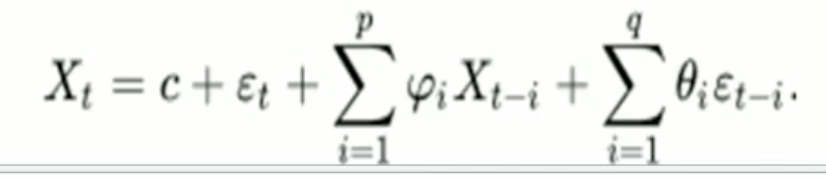

Predicted value at time t = constant + error at time t + summation of all observations at t-i + summation of all errors at t-i

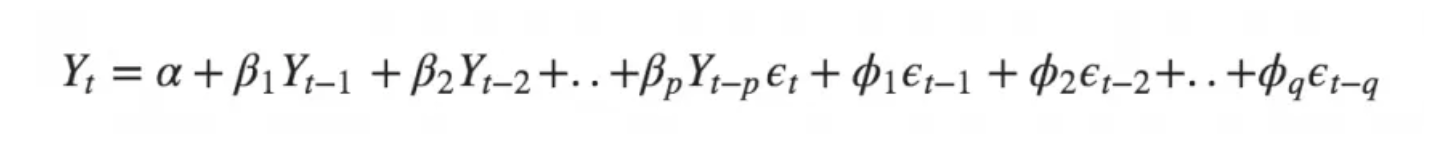

This is the expanded version.

In [1]:
#pip install pmdarima

In [2]:
#pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df=pd.read_csv('starter_data/arima_example_data.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<AxesSubplot:xlabel='DATE'>

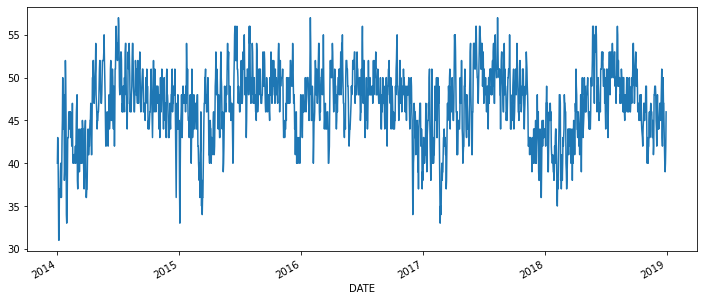

In [5]:
df['AvgTemp'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [7]:
# running the adf test
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068784
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


- If p-val > 0.05: not stationary
- If p-val < 0.05 stationary

In [8]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           
print(stepwise_fit)
stepwise_fit.summary()

 ARIMA(1,0,5)(0,0,0)[0] intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.499
Date:                Wed, 09 Feb 2022   AIC                           8294.997
Time:                        14:24:21   BIC                           8339.054
Sample:                             0   HQIC                          8311.251
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2609      0.376      3.354      0.001       0.524       1.998
ar.L1          0.9729      0.008    120.113      0.000       0.957       0.989
ma.L1         -0.1246      0.024     -5.224      0.000      -0.171      -0.078
ma.L2         -0.2176      0.024     -8.963      0.000      -0.265      -0.170
ma.L3         -0.2038      0.024     -8.482      0.000      -0.251      -0.157
ma.L4         -0.1360      0.023     -5.945      0.000      -0.181      -0.091
ma.L5         -0.0481      0.024     -1.965      0.049      -0.096      -0.000
sigma2         5.5177      0.173     31.833      0.000       5.178       5.857
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.60
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# last 30 is testing data, the rest is training
# can be split in another way, but usually is 80:20 or 70:30 for train:test data

print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Wed, 09 Feb 2022   AIC                           8292.261
Time:                        14:31:05   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5284      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.910      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.000      -0.185      -0.095
ma.L2         -0.2328      0.023    -10.038      0.000      -0.278      -0.187
ma.L3         -0.2163      0.023     -9.280      0.000      -0.262      -0.171
ma.L4         -0.1478      0.023     -6.542      0.000      -0.192      -0.104
ma.L5         -0.0587      0.024     -2.424      0.015      -0.106      -0.011
sigma2         5.5080      0.173     31.925      0.000       5.170       5.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

DATE
2018-12-01    44.743659
2018-12-02    44.354267
2018-12-03    42.939617
2018-12-04    45.754274
2018-12-05    47.930991
2018-12-06    44.855744
2018-12-07    44.185676
2018-12-08    45.287438
2018-12-09    44.513030
2018-12-10    45.375240
2018-12-11    46.014677
2018-12-12    46.746901
2018-12-13    46.596896
2018-12-14    44.852408
2018-12-15    45.981112
2018-12-16    46.833421
2018-12-17    48.397212
2018-12-18    49.771462
2018-12-19    42.706714
2018-12-20    42.796038
2018-12-21    48.366615
2018-12-22    49.511811
2018-12-23    46.341752
2018-12-24    46.404668
2018-12-25    44.215879
2018-12-26    43.067256
2018-12-27    41.607901
2018-12-28    40.981616
2018-12-29    41.968533
2018-12-30    43.435178
Name: ARIMA predictions, dtype: float64


<AxesSubplot:xlabel='DATE'>

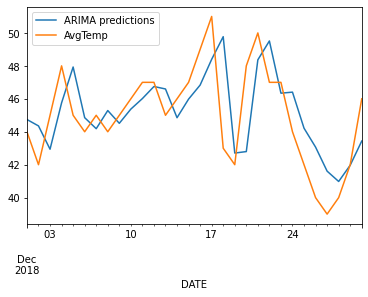

In [28]:
start= len(train)
end=len(train)+len(test)-1

index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
print(pred)
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

<AxesSubplot:xlabel='DATE'>

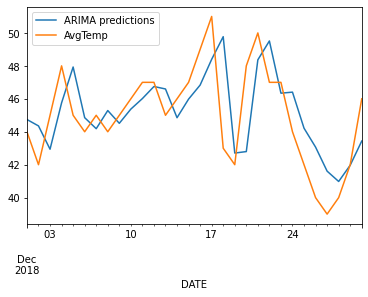

In [29]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [33]:
test_mean = test['AvgTemp'].mean()

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)
#average rmse

2.3263149869322763


In [34]:
#average rmse / average mean
rmse / test_mean

0.05169588859849503

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.